<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/kalman_geminis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¿Qué es un filtro de Kalman?
Un filtro de Kalman es un algoritmo matemático que utiliza una serie de mediciones observadas a lo largo del tiempo que contienen ruido e imprecisiones para producir estimaciones de estados de un sistema, como la posición y velocidad de un objeto en movimiento. Su principal función es predecir el estado futuro del sistema basándose en el estado actual y corregir esas predicciones con las nuevas mediciones.

El filtro de Kalman opera en un ciclo de dos pasos: predicción y actualización.

Paso de Predicción: Estima el estado futuro del sistema (por ejemplo, la próxima posición del avión) basándose en su estado actual y en un modelo de movimiento.

Paso de Actualización: Corrige la estimación de la predicción utilizando nuevas mediciones. Si la medición es ruidosa, el filtro le dará menos peso; si la predicción es incierta, le dará más peso a la medición.

Componentes clave para el seguimiento de un avión
Para aplicar un filtro de Kalman al seguimiento de un avión, necesitarías modelar las siguientes matrices:

Matriz de Transición de Estado (F): Representa el modelo físico del movimiento del avión. Por ejemplo, un modelo de velocidad constante en dos dimensiones.

Matriz de Covarianza del Ruido del Proceso (Q): Cuantifica la incertidumbre en el modelo de movimiento del avión (por ejemplo, cambios aleatorios en la velocidad o la aceleración).

Matriz de Observación (H): Conecta el estado del sistema con las mediciones. Por ejemplo, si solo mides la posición, la matriz tomará las coordenadas de posición del estado del sistema.

Matriz de Covarianza del Ruido de Medición (R): Cuantifica la incertidumbre de las mediciones del sensor (por ejemplo, el radar o el GPS).

Vector de Estado Inicial (x_0): Representa la primera estimación de la posición y velocidad del avión.

Matriz de Covarianza de Error de Estimación Inicial (P_0): Representa la incertidumbre de esa primera estimación.

Ejemplo Simplificado en Python
Aquí tienes un código que simula el seguimiento de un objeto en movimiento unidimensional (por ejemplo, un avión que se mueve en línea recta) utilizando el filtro de Kalman con la biblioteca NumPy. Puedes copiar este código y ejecutarlo en Colab.

Python


¿Qué es un Filtro de Kalman y cómo se aplica al seguimiento de un avión?

Como mencionamos antes, un filtro de Kalman es un algoritmo poderoso para estimar el estado de un sistema dinámico (como un avión en vuelo) a partir de mediciones ruidosas. En el contexto del seguimiento de un avión, el filtro utiliza datos de sensores (como mediciones de posición con ruido) para generar una estimación más precisa de la posición y velocidad del avión en un momento dado, e incluso predecir su trayectoria futura.

El filtro opera en dos fases:

Predicción: Basándose en el estado actual del avión (su última posición y velocidad estimadas) y un modelo de cómo se mueve, el filtro predice dónde estará el avión en el siguiente instante. También estima la incertidumbre de esta predicción.

Actualización: Cuando llega una nueva medición del sensor, el filtro la combina con la predicción. Si la medición es muy ruidosa o el modelo de predicción es muy bueno, le da más peso a la predicción. Si la predicción es muy incierta o la medición es muy precisa, le da más peso a la medición. El resultado es una estimación optimizada del estado del avión.



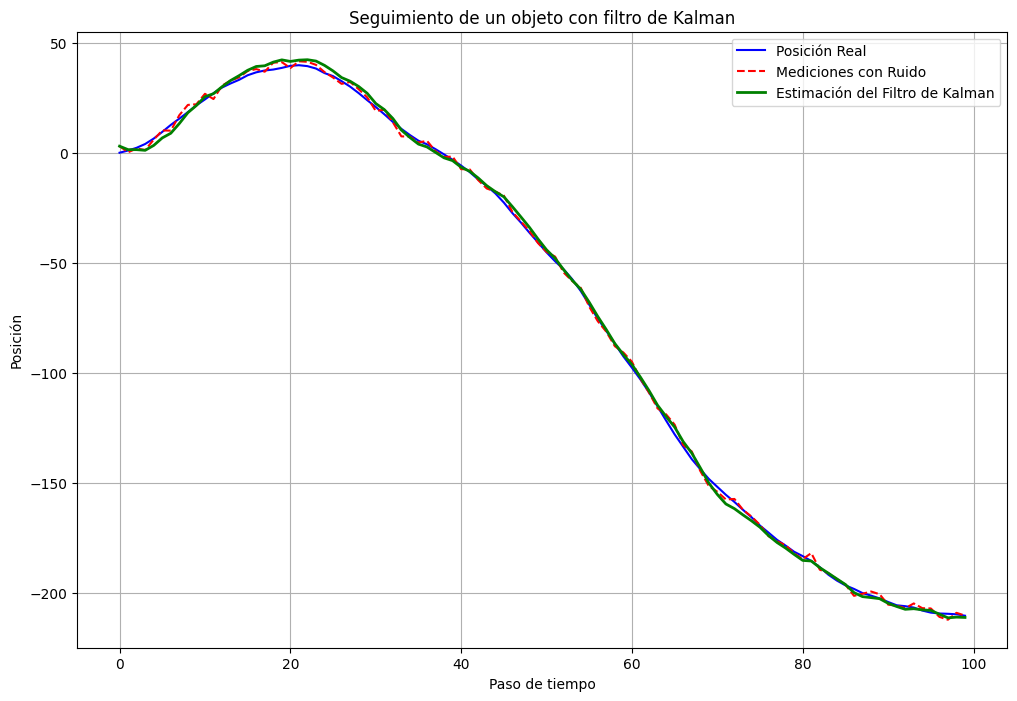

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definición del filtro de Kalman

def kalman_filter(z, x, P, F, H, Q, R):
    """
    Función de filtro de Kalman
    z: medición actual
    x: estado actual estimado
    P: covarianza de error de estimación actual
    F: matriz de transición de estado
    H: matriz de observación
    Q: covarianza del ruido del proceso
    R: covarianza del ruido de medición
    """
    # Paso de Predicción
    x_pred = F @ x
    P_pred = F @ P @ F.T + Q

    # Paso de Actualización
    y = z - H @ x_pred
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)
    x_new = x_pred + K @ y
    P_new = (np.eye(len(x)) - K @ H) @ P_pred

    return x_new, P_new

# --- Simulación de datos ---

# Parámetros del modelo
dt = 1.0  # Intervalo de tiempo
posicion_real = np.zeros(100)
velocidad_real = np.zeros(100)
ruido_medicion = np.random.normal(0, 1.5, 100)  # Ruido del sensor

# Generación de la trayectoria real
posicion_real[0] = 0
velocidad_real[0] = 1.0
for i in range(1, 100):
    velocidad_real[i] = velocidad_real[i-1] + np.random.normal(0, 0.5)
    posicion_real[i] = posicion_real[i-1] + velocidad_real[i-1] * dt

# Medidas con ruido
mediciones = posicion_real + ruido_medicion

# --- Configuración del filtro de Kalman ---

# Matriz de Transición de Estado (F)
# Estado: [posición, velocidad]
F = np.array([[1, dt],
              [0, 1]])

# Matriz de Observación (H)
# Medimos solo la posición
H = np.array([[1, 0]])

# Covarianza del Ruido del Proceso (Q)
# Ruido en el modelo de movimiento
Q = np.array([[0.05, 0],
              [0, 0.05]])

# Covarianza del Ruido de Medición (R)
# Ruido del sensor (la varianza del ruido que generamos es 1.5^2)
R = np.array([[1.5**2]])

# Estado inicial
x = np.array([[mediciones[0]],
              [0]])  # Estimamos la velocidad inicial en 0

# Covarianza de error inicial
P = np.array([[1, 0],
              [0, 1]])

# Almacenar resultados
posiciones_estimadas = []

# --- Bucle de ejecución del filtro ---
for z in mediciones:
    # Convertir la medición a un array 2D para el cálculo de matrices
    z_vector = np.array([[z]])

    # Aplicar el filtro de Kalman
    x, P = kalman_filter(z_vector, x, P, F, H, Q, R)

    # Almacenar la posición estimada
    posiciones_estimadas.append(x[0, 0])

# --- Visualización de resultados ---
plt.figure(figsize=(12, 8))
plt.plot(posicion_real, label='Posición Real', color='blue')
plt.plot(mediciones, label='Mediciones con Ruido', color='red', linestyle='--')
plt.plot(posiciones_estimadas, label='Estimación del Filtro de Kalman', color='green', linewidth=2)
plt.title('Seguimiento de un objeto con filtro de Kalman')
plt.xlabel('Paso de tiempo')
plt.ylabel('Posición')
plt.legend()
plt.grid(True)
plt.show()

El Filtro de Kalman: Un Estimador Inteligente

Imagina que tienes un avión volando ✈️, y quieres saber exactamente dónde está y a qué velocidad va, pero tus sensores (como el GPS o un radar) no son perfectos; siempre tienen un poco de ruido o error. El Filtro de Kalman es como un "cerebro" matemático que combina:

Lo que crees que va a pasar (basado en cómo se movió el avión antes y cómo crees que se mueve).

Lo que tus sensores te dicen (las mediciones ruidosas).

Y a partir de eso, te da la mejor estimación posible del estado real del avión (posición y velocidad), ¡mucho más precisa que si solo usaras las mediciones crudas!

El filtro funciona en un ciclo continuo de dos pasos principales: Predicción y Actualización.

1. Paso de Predicción (¡Dónde creemos que estará!)

En este paso, el filtro intenta adivinar dónde estará el avión a continuación basándose en su estado actual y en cómo se espera que se mueva.

Tu estado actual (lo que ya sabes):

x
k−1![Captura de pantalla 2025-08-19 a las 20.17.43.png]()
​
 : La mejor estimación de la posición y velocidad del avión en el momento anterior. Es un vector que contiene [pos_x, pos_y, vel_x, vel_y].

P
k−1
​
 : La incertidumbre o "error" de esa estimación. Es una matriz que nos dice cuán seguros estamos de nuestros valores de x
k−1
​
 .

Tu modelo de movimiento:

F: La matriz de transición de estado. Piensa en ella como una fórmula que te dice: "Si el avión estaba aquí con esta velocidad, ¿dónde debería estar en el siguiente instante de tiempo dt?". Por ejemplo, nueva_pos = pos_anterior + vel * dt.

Q: La matriz de covarianza del ruido del proceso. Esto representa la incertidumbre en tu modelo de movimiento. ¿El avión siempre sigue tu modelo perfectamente? ¡No! Hay ráfagas de viento, pequeños ajustes del piloto, etc. Q cuantifica cuánto "ruido" o impredecibilidad hay en el propio movimiento del avión.

Las ecuaciones de Predicción son:

Predicción del estado futuro:
x
k
−
​
  = F⋅x
k−1
​


Aquí, x
k
−
​
  es tu predicción de la posición y velocidad del avión en el momento k, antes de haber recibido una nueva medición.

Es tu estado anterior (x
k−1
​
 ) "adelantado" por tu modelo de movimiento (F).

Predicción de la incertidumbre:
P
k
−
​
  = F⋅P
k−1
​
 ⋅F
T
 +Q

P
k
−
​
  es la incertidumbre de tu predicción x
k
−
​
 .

La incertidumbre aumenta porque te estás moviendo en el tiempo (F⋅P
k−1
​
 ⋅F
T
 ) y también porque tu modelo de movimiento no es perfecto (sumamos Q).

2. Paso de Actualización (¡Ahora que tengo una nueva pista!)

En este paso, el filtro toma la predicción que hizo y la corrige utilizando la nueva medición ruidosa del sensor.

La nueva información:

z
k
​
 : La medición real que recibes de tus sensores en el momento k (por ejemplo, [pos_x_medida, pos_y_medida]). ¡Esta tiene ruido!

H: La matriz de observación. Esto nos dice cómo se relaciona el estado del avión (x) con lo que realmente miden tus sensores (z). Por ejemplo, si tu estado es [pos_x, pos_y, vel_x, vel_y] y solo mides [pos_x, pos_y], H "extrae" solo la posición del estado.

R: La matriz de covarianza del ruido de medición. Esto representa cuán ruidosas o imprecisas son tus mediciones de los sensores. Un valor alto en R significa que no confías mucho en tus sensores.

Las ecuaciones de Actualización son:

Innovación (o "residuo de la medición"):
y
k
​
 =z
k
​
 −H⋅x
k
−
​


Esto es simplemente la diferencia entre lo que el sensor midió (z
k
​
 ) y lo que tú predijiste que el sensor debería medir (H⋅x
k
−
​
 ). Nos dice cuán "equivocados" estábamos en nuestra predicción.

Covarianza de la Innovación:
S
k
​
 =H⋅P
k
−
​
 ⋅H
T
 +R

S
k
​
  es la incertidumbre total de esa diferencia (y
k
​
 ). Combina la incertidumbre de nuestra predicción (P
k
−
​
 ) con la incertidumbre del sensor (R).

Ganancia de Kalman:
K
k
​
 =P
k
−
​
 ⋅H
T
 ⋅S
k
−1
​


Esta es la pieza clave. La Ganancia de Kalman (K
k
​
 ) decide cuánto debemos confiar en la nueva medición (z
k
​
 ) versus nuestra predicción original (x
k
−
​
 ).

Si R (ruido del sensor) es pequeño, S
k
​
  será pequeño y K
k
​
  será grande: confías mucho en la medición.

Si P
k
−
​
  (incertidumbre de tu predicción) es pequeño, K
k
​
  será pequeño: confías más en tu predicción.

Básicamente, es un ponderador inteligente.

Actualización del estado (¡La nueva mejor estimación!):
x
k
​
 =x
k
−
​
 +K
k
​
 ⋅y
k
​


x
k
​
  es la mejor estimación final del estado del avión en el momento k.

Tomamos nuestra predicción (x
k
−
​
 ) y le sumamos una corrección basada en cuán "equivocados" estábamos (y
k
​
 ), escalada por la Ganancia de Kalman (K
k
​
 ).

Actualización de la incertidumbre:
P
k
​
 =(I−K
k
​
 ⋅H)⋅P
k
−
​


P
k
​
  es la nueva incertidumbre de nuestra estimación x
k
​
 .

Al incorporar la nueva medición, nuestra incertidumbre siempre disminuye, ya que tenemos más información.

En Resumen:

El Filtro de Kalman es un algoritmo que, en cada paso de tiempo, predice el futuro basándose en el pasado, luego corrige esa predicción con una nueva medición ruidosa, y lo hace de la manera óptima posible, siempre minimizando la incertidumbre. Es como un GPS muy inteligente que sabe que su propia señal puede fallar, pero también sabe cómo el coche suele moverse, y usa ambas cosas para darte la posición más exacta.

Espero que esta explicación te ayude a entender mejor la matemática detrás de este potente filtro. ¡Si tienes más preguntas, no dudes en consultarme!


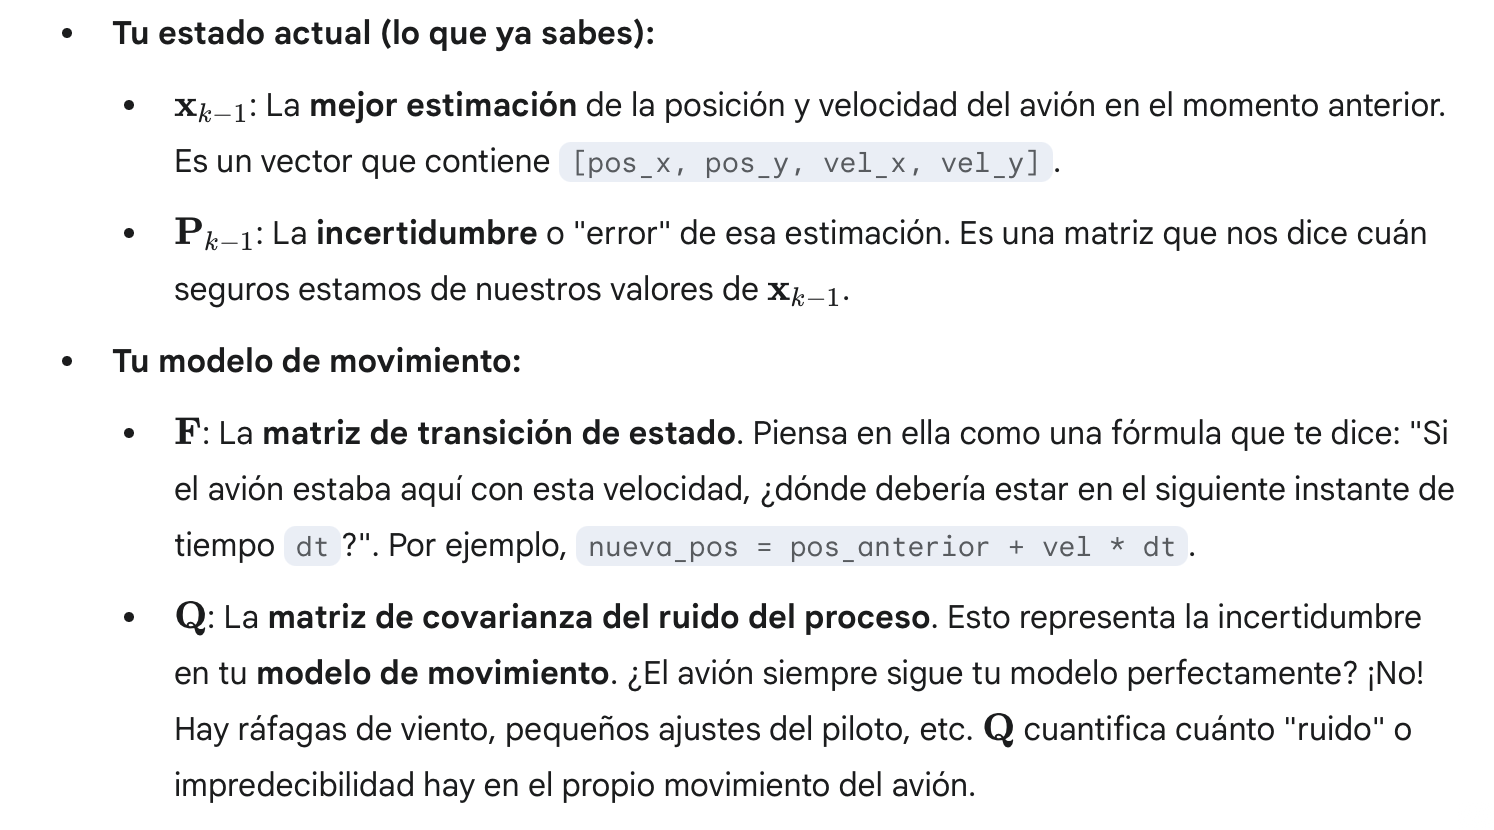